## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np 
import pandas as pd 
import datetime
import os
from PIL import Image
from random import shuffle

%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/Dog Breed/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
df = pd.read_csv("/content/labels.csv")
df.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


### Print the count of each category of Dogs given in the dataset



In [0]:
df.breed.value_counts()


scottish_deerhound                126
maltese_dog                       117
afghan_hound                      116
entlebucher                       115
bernese_mountain_dog              114
shih-tzu                          112
great_pyrenees                    111
pomeranian                        111
basenji                           110
samoyed                           109
airedale                          107
tibetan_terrier                   107
leonberg                          106
cairn                             106
beagle                            105
japanese_spaniel                  105
miniature_pinscher                102
blenheim_spaniel                  102
australian_terrier                102
irish_wolfhound                   101
lakeland_terrier                   99
saluki                             99
papillon                           96
norwegian_elkhound                 95
whippet                            95
siberian_husky                     95
pug         

In [0]:
breed_count = df.breed.value_counts()
print(breed_count.head(5))

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64


In [66]:
import seaborn as sns



<Figure size 1440x5760 with 0 Axes>

<Figure size 1440x5760 with 0 Axes>

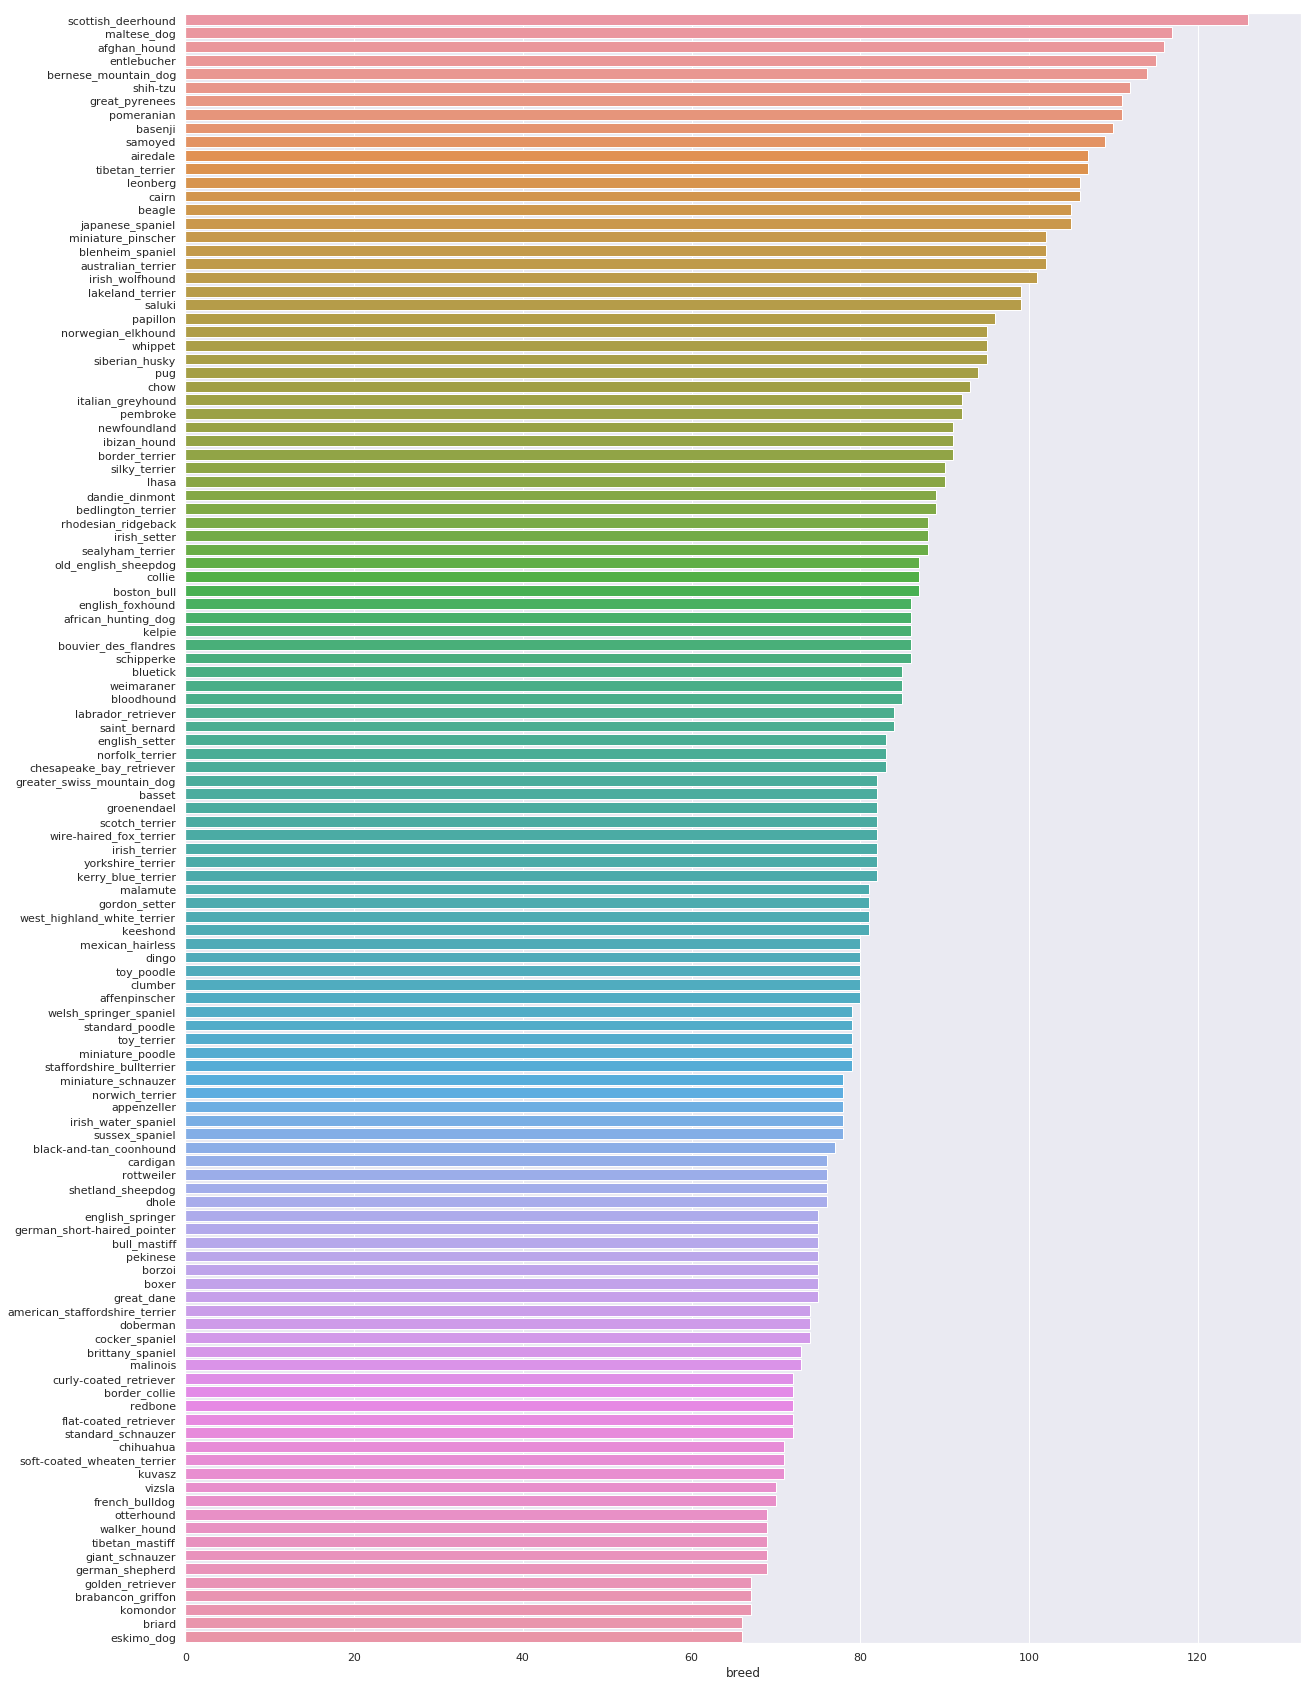

In [73]:
plt.figure(figsize=(20,30))
sns.set(style="darkgrid")
sns.set(font_scale=1)
sns.set_color_codes(palette='pastel')
ax = sns.barplot(breed_count,breed_count.index)
plt.show()

## **We can see there are some breeds which have less representation and some breeds which have a high representation. With a ratio of 1:2 in favour of the higher representation.
## This may lead to bias during classification as some dog breeds does not have enough representation. We will try to use ImageData generator to  increase the number of samples**

### Get one-hot encodings of labels

In [0]:
dog_breed = pd.Series(df['breed'])
dummies = pd.get_dummies(dog_breed, sparse = True)
labels_new = np.asarray(dummies)

In [0]:
dummies.head(5)

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,english_foxhound,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
labels_new[133]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows = 128
img_cols = 128
num_channel = 1
images = []
classes = []

In [0]:
from tqdm import tqdm
import cv2

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
for f, img in tqdm(df.values):
    train_img = cv2.imread('/content/train/{}.jpg'.format(f), 1)
    train_img_resize = cv2.resize(train_img, (img_rows, img_cols))
    images.append(train_img_resize)
    classes.append(img)

100%|██████████| 10222/10222 [00:27<00:00, 376.03it/s]


Plotting an Image from the Samples

doberman


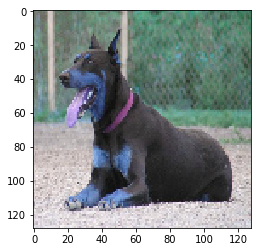

In [0]:
import matplotlib.pyplot as plt
plt.imshow(images[20])
print(dog_breed[20])

#**Creating X_Train and Y_Train Arrays to use in the Test_Train_Split**

In [0]:
#assign images and labes to numpy arrays
classes = labels_new
x_train = np.asarray(images, dtype=np.float32)#/255
y_train = np.asarray(classes, dtype=np.uint8)

#x_train = x_train.astype('float32')/255
#x_test = x_test.astype('float32')/255
#Normalizing the input
#x_train /= 255
#x_test /= 255

print(x_train.shape)
print(y_train.shape)

(10222, 128, 128, 3)
(10222, 120)


In [0]:
#x_train=x_train[:5000]
#y_train=y_train[:5000]

In [0]:
print(x_train.shape)
print(y_train.shape)

(10222, 128, 128, 3)
(10222, 120)


### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state=47, shuffle = True)

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
sample = pd.read_csv("/content/sample_submission.csv")


In [0]:
sample.head(5)

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

In [0]:
sample.shape

(10357, 121)

In [0]:
test_img = sample.id
test_img.head(5)

0    000621fb3cbb32d8935728e48679680e
1    00102ee9d8eb90812350685311fe5890
2    0012a730dfa437f5f3613fb75efcd4ce
3    001510bc8570bbeee98c8d80c8a95ec1
4    001a5f3114548acdefa3d4da05474c2e
Name: id, dtype: object

Run the below code to load the test image files in x_test_feature

In [0]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:50<00:00, 205.93it/s]


Normalize the test data and convert it into 4 dimensions

In [0]:
x_test = np.asarray(x_test_feature, dtype=np.uint8)
x_test.shape
#x_test = x_test.astype('float32')#/255
#Normalizing the input
#x_test /= 255
#print(x_test.shape)




(10357, 128, 128, 3)

In [0]:
#x_test=x_test[:5000]
#y_test=y_test[:5000]
print(x_test.shape)

(10357, 128, 128, 3)


### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (5, 5), padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(64, kernel_size = (3, 3), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(120, activation='softmax'))

W0714 11:14:35.216443 140645167458176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0714 11:14:35.260389 140645167458176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0714 11:14:35.267863 140645167458176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1048576)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               268435712 
_________________________________________________________________
dense_2 (Dense)              (None, 120)               30840     
Total params: 268,487,480
Trainable params: 268,487,480
Non-trainable params: 0
_________________________________________________________________


### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
model.compile(loss='categorical_crossentropy', optimizer ='adam', metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size = 128, epochs = 10, verbose = 1)

W0714 11:14:40.643678 140645167458176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0714 11:14:40.682161 140645167458176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0714 11:14:40.826448 140645167458176 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0714 11:14:40.903499 140645167458176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated

Epoch 1/10
7155/7155 [==============================] - 58s 8ms/step - loss: 15.9571 - acc: 0.0098
Epoch 2/10
7155/7155 [==============================] - 43s 6ms/step - loss: 15.9604 - acc: 0.0098
Epoch 3/10
7155/7155 [==============================] - 43s 6ms/step - loss: 15.9604 - acc: 0.0098
Epoch 4/10
7155/7155 [==============================] - 43s 6ms/step - loss: 15.9604 - acc: 0.0098
Epoch 5/10
7155/7155 [==============================] - 43s 6ms/step - loss: 15.9604 - acc: 0.0098
Epoch 6/10
7155/7155 [==============================] - 43s 6ms/step - loss: 15.9604 - acc: 0.0098
Epoch 7/10
7155/7155 [==============================] - 43s 6ms/step - loss: 15.9604 - acc: 0.0098
Epoch 8/10
7155/7155 [==============================] - 43s 6ms/step - loss: 15.9604 - acc: 0.0098
Epoch 9/10
7155/7155 [==============================] - 43s 6ms/step - loss: 15.9604 - acc: 0.0098
Epoch 10/10
7155/7155 [==============================] - 43s 6ms/step - loss: 15.9604 - acc: 0.0098


In [0]:
#early = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='auto')

#epochs=10
# Train the model 
#model.fit(x_train, y_train, epochs = epochs, validation_data=(x_val, y_val), batch_size = 128, callbacks = [early])

In [0]:
modelscore = model.evaluate(x_val, y_val, verbose = 1)
print(('Validation loss: {0:.2f}%').format(modelscore[0]*100))
print(('Validation accuracy: {0:.2f}%').format(modelscore[1]*100))

3067/3067 [==============================] - 5s 2ms/step
Validation loss: 1598.67%
Validation accuracy: 0.82%


#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(featurewise_center=False, 
                                   samplewise_center=False, 
                                   featurewise_std_normalization=False, 
                                   samplewise_std_normalization=False, 
                                   zca_whitening=False, 
                                   rotation_range=20, 
                                   width_shift_range=0.1, 
                                   height_shift_range=0.1, 
                                   horizontal_flip=True, 
                                   vertical_flip=True, 
                                   data_format='channels_last')

valid_datagen = ImageDataGenerator()

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = train_datagen.flow(x_train, y_train, batch_size = 128)
valid_generator = valid_datagen.flow(x_val, y_val, batch_size = 128)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
model.fit_generator(train_generator, steps_per_epoch = 200, epochs = 10, 
                    validation_data = valid_generator, validation_steps = x_val.shape[0])

Epoch 1/10
200/200 [==============================] - 738s 4s/step - loss: 15.9631 - acc: 0.0096 - val_loss: 15.9867 - val_acc: 0.0082
Epoch 2/10
200/200 [==============================] - 735s 4s/step - loss: 15.9540 - acc: 0.0102 - val_loss: 15.9867 - val_acc: 0.0082
Epoch 3/10
200/200 [==============================] - 735s 4s/step - loss: 15.9699 - acc: 0.0092 - val_loss: 15.9868 - val_acc: 0.0081
Epoch 4/10
200/200 [==============================] - 731s 4s/step - loss: 15.9479 - acc: 0.0106 - val_loss: 15.9865 - val_acc: 0.0082
Epoch 5/10
200/200 [==============================] - 729s 4s/step - loss: 15.9657 - acc: 0.0095 - val_loss: 15.9869 - val_acc: 0.0081
Epoch 6/10
200/200 [==============================] - 730s 4s/step - loss: 15.9668 - acc: 0.0094 - val_loss: 15.9869 - val_acc: 0.0081
Epoch 7/10
200/200 [==============================] - 733s 4s/step - loss: 15.9562 - acc: 0.0100 - val_loss: 15.9865 - val_acc: 0.0082
Epoch 8/10
200/200 [==============================] - 7

In [0]:
score_2 = model.evaluate(x_val, y_val, verbose = 1)
print(('Validation loss: {0:.2f}%').format(score_2[0]*100))
print(('Validation accuracy: {0:.2f}%').format(score_2[1]*100))

3067/3067 [==============================] - 5s 2ms/step
Validation loss: 1598.67%
Validation accuracy: 0.82%


# We will use VGG16 to try to improve the Accuracy


!

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)


In [0]:
base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

W0714 14:16:58.280257 140645167458176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Print the summary of the base_model

In [0]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
from keras import Model, Input
from keras.layers import BatchNormalization,Flatten

In [0]:
modelvgg = base_model.output

modelvgg = BatchNormalization()(modelvgg)
modelvgg = Dropout(0.35)(modelvgg)
modelvgg = Dense(1024, activation='relu')(modelvgg)
modelvgg = Dense(256, activation='relu')(modelvgg)
modelvgg = Dense(256, activation='relu')(modelvgg)
modelvgg = Dropout(0.15)(modelvgg)

predictions = Dense(120, activation='softmax')(modelvgg)

# this is the model we will train
model_t = Model(inputs=base_model.input, outputs=predictions)

W0714 14:21:40.884328 140645167458176 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
for layer in base_model.layers:
    layer.trainable = False

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
model_t.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='auto')
callbacks = [early_stopping]

history = model_t.fit(x_train, y_train, batch_size = 128, epochs = 10, 
                      validation_data = (x_val, y_val), verbose = 1, callbacks = callbacks)

Train on 7155 samples, validate on 3067 samples
Epoch 1/10
7155/7155 [==============================] - 42s 6ms/step - loss: 4.3495 - acc: 0.0752 - val_loss: 3.3379 - val_acc: 0.2325
Epoch 2/10
7155/7155 [==============================] - 30s 4ms/step - loss: 2.9431 - acc: 0.2723 - val_loss: 2.5912 - val_acc: 0.3381
Epoch 3/10
7155/7155 [==============================] - 30s 4ms/step - loss: 2.3762 - acc: 0.3715 - val_loss: 2.4082 - val_acc: 0.3763
Epoch 4/10
7155/7155 [==============================] - 30s 4ms/step - loss: 2.0684 - acc: 0.4393 - val_loss: 2.3136 - val_acc: 0.3932
Epoch 5/10
7155/7155 [==============================] - 30s 4ms/step - loss: 1.8541 - acc: 0.4875 - val_loss: 2.2704 - val_acc: 0.4046
Epoch 6/10
7155/7155 [==============================] - 30s 4ms/step - loss: 1.6714 - acc: 0.5294 - val_loss: 2.2349 - val_acc: 0.4118
Epoch 7/10
7155/7155 [==============================] - 30s 4ms/step - loss: 1.4976 - acc: 0.5720 - val_loss: 2.2694 - val_acc: 0.4131
Epoch 8

## **Comparing the VGG16 Model with the Basic Sequential Model VGG provides more accuracy**

In [60]:
model.fit_generator(train_generator, steps_per_epoch = 200, epochs = 10, 
                    validation_data = valid_generator, validation_steps = 400)

Epoch 1/10
200/200 [==============================] - 228s 1s/step - loss: 15.9621 - acc: 0.0097 - val_loss: 15.9863 - val_acc: 0.0082
Epoch 2/10
200/200 [==============================] - 227s 1s/step - loss: 15.9598 - acc: 0.0098 - val_loss: 15.9854 - val_acc: 0.0082
Epoch 3/10
200/200 [==============================] - 227s 1s/step - loss: 15.9649 - acc: 0.0095 - val_loss: 15.9885 - val_acc: 0.0080
Epoch 4/10
200/200 [==============================] - 227s 1s/step - loss: 15.9561 - acc: 0.0100 - val_loss: 15.9863 - val_acc: 0.0082
Epoch 5/10
200/200 [==============================] - 227s 1s/step - loss: 15.9582 - acc: 0.0099 - val_loss: 15.9869 - val_acc: 0.0081
Epoch 6/10
200/200 [==============================] - 227s 1s/step - loss: 15.9603 - acc: 0.0098 - val_loss: 15.9850 - val_acc: 0.0083
Epoch 7/10
200/200 [==============================] - 228s 1s/step - loss: 15.9615 - acc: 0.0097 - val_loss: 15.9879 - val_acc: 0.0081
Epoch 8/10
200/200 [==============================] - 2